## Analyse der Intensivnutzung auf Social Media

In [26]:
pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 11.8 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.7/38.7 MB 11.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [statsmodels] [statsmodels]
Note: you may need to restart the kernel to use updated packages.


In [27]:
# import der Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

# Datensatz laden
df = pd.read_csv('data/Datensatz_Intensivnutzung.csv', sep=';', encoding='latin1')
df.head()

,za_nr,version,doi,lfdn,SC1,SC2_1,SC2_2,SC2_3,SC2_4,SC2_5,...,S1,S2,S3,S4,S5,S6,S7,S8,S9,FAKTdly
0,6720,1.0.0 (2019-03-29),doi:10.4232/1.13221,10371,Mehrmals täglich,quoted,quoted,quoted,quoted,not quoted,...,Männlich,37 Jahre,1 Person,Mittlere Reife oder Abschluss der polytechnisc...,Voll-/Teilzeiterwerbstätig (auch Mini-Jobs),Angestellte/r,Berlin,500.000 oder mehr Einwohner,Keine Angabe,"0,857"
1,6720,1.0.0 (2019-03-29),doi:10.4232/1.13221,10372,Mehrmals täglich,quoted,not quoted,not quoted,not quoted,not quoted,...,Weiblich,28 Jahre,2 Personen,Von der Schule abgegangen ohne Schulabschluss,Voll-/Teilzeiterwerbstätig (auch Mini-Jobs),Arbeiter/in,Brandenburg,20.000 bis unter 50.000 Einwohner,2.000 bis unter 2.500 EURO,"2,579"
2,6720,1.0.0 (2019-03-29),doi:10.4232/1.13221,10374,Mehrmals täglich,quoted,not quoted,not quoted,not quoted,not quoted,...,Weiblich,40 Jahre,3 Personen,Mittlere Reife oder Abschluss der polytechnisc...,Hausfrau/Hausmann,,Niedersachsen,100.000 bis unter 500.000 Einwohner,Keine Angabe,"0,614"
3,6720,1.0.0 (2019-03-29),doi:10.4232/1.13221,10375,Etwa einmal täglich,quoted,not quoted,not quoted,not quoted,not quoted,...,Männlich,38 Jahre,2 Personen,"Abitur, Fachhochschulreife (Gymnasium oder erw...",Voll-/Teilzeiterwerbstätig (auch Mini-Jobs),Selbstständige/r bzw. Freiberufler/in,Nordrhein-Westfalen,100.000 bis unter 500.000 Einwohner,3.000 bis unter 4.000 EURO,"1,048"
4,6720,1.0.0 (2019-03-29),doi:10.4232/1.13221,10377,Mehrmals täglich,quoted,quoted,not quoted,quoted,not quoted,...,Weiblich,31 Jahre,3 Personen,"Abitur, Fachhochschulreife (Gymnasium oder erw...",Hausfrau/Hausmann,,Baden-Württemberg,50.000 bis unter 100.000 Einwohner,2.000 bis unter 2.500 EURO,"0,724"


### Überblick: Struktur und erste Einblicke in die Daten
Schauen wir uns die Dimensionen und die Spaltennamen des Datensatzes an. Anschließend werden einige deskriptive Statistiken berechnet.

In [29]:
# Dimensionen und Spaltennamen
df.shape, df.columns.tolist()[:20]  # Zeige die ersten 20 Spaltennamen

((1008, 175),
 ['za_nr',
  'version',
  'doi',
  'lfdn',
  'SC1',
  'SC2_1',
  'SC2_2',
  'SC2_3',
  'SC2_4',
  'SC2_5',
  'SC2_6',
  'SC2_7',
  'SC2_8',
  'SC2_9',
  'SC2_10',
  'SC2_11',
  'SC2_99',
  'SC3_1',
  'SC3_2',
  'SC3_3'])

In [30]:
# Übersicht: Deskriptive Statistiken für numerische und kategoriale Variablen
df.describe(include='all').T.head(20)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
za_nr,1008.0,NaN,NaN,NaN,6720.0,0.0,6720.0,6720.0,6720.0,6720.0,6720.0
version,1008,1,1.0.0 (2019-03-29),1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN
doi,1008,1,doi:10.4232/1.13221,1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lfdn,1008.0,NaN,NaN,NaN,12003.713294,2214.967359,10371.0,10983.75,11528.5,12109.25,20604.0
SC1,1008,3,Mehrmals täglich,729,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SC2_1,1008,2,quoted,853,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SC2_2,1008,2,not quoted,585,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SC2_3,1008,2,not quoted,855,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SC2_4,1008,2,not quoted,545,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SC2_5,1008,2,not quoted,847,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Visualisierung: Verteilung der Altersangaben
Wir betrachten die Altersverteilung der Befragten.

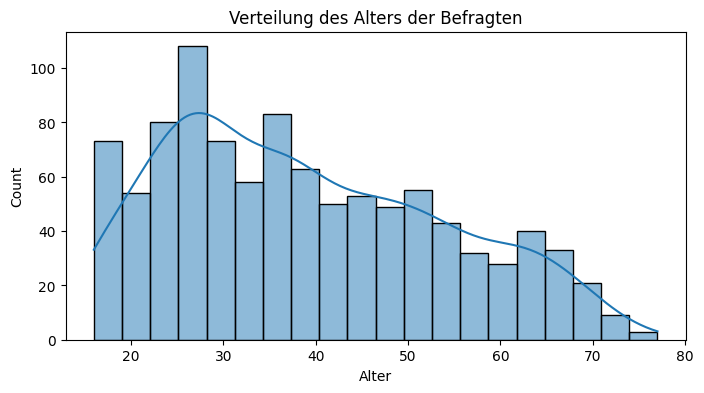

In [31]:
# Altersverteilung (Spalte vermutlich: 'S2' oder ähnlich, bitte ggf. anpassen)
plt.figure(figsize=(8,4))
sns.histplot(df['S2'].str.extract(r'(\d+)').astype(float).dropna()[0], bins=20, kde=True)
plt.xlabel('Alter')
plt.title('Verteilung des Alters der Befragten')
plt.show()

### Visualisierung: Geschlechterverteilung

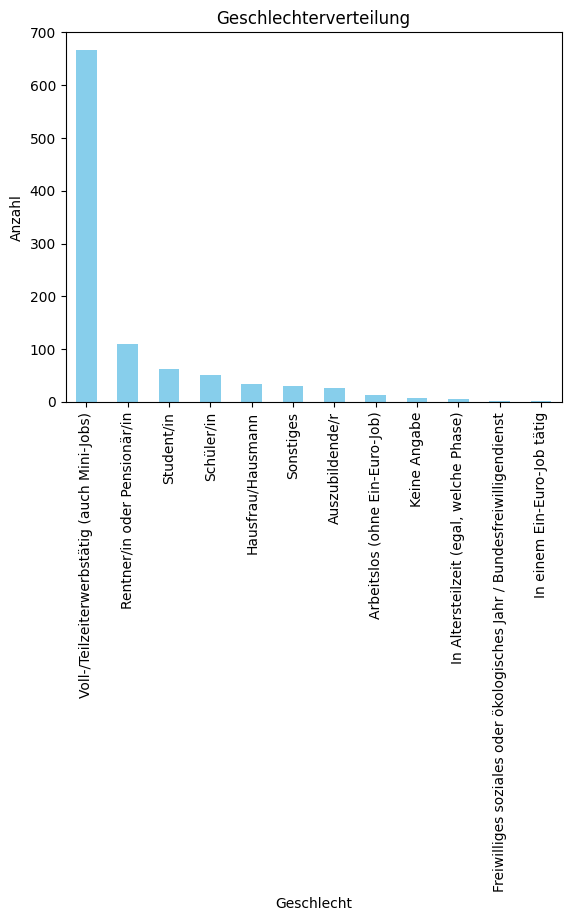

In [32]:
# Geschlechterverteilung (Spalte vermutlich: 'S5')
df['S5'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Geschlecht')
plt.ylabel('Anzahl')
plt.title('Geschlechterverteilung')
plt.show()

### Visualisierung: Nutzungsfrequenz sozialer Netzwerke
Wir betrachten die Verteilung der Antwortkategorie in der Spalte 'SC1' (z.B. "Mehrmals täglich", "Etwa einmal täglich" etc.).

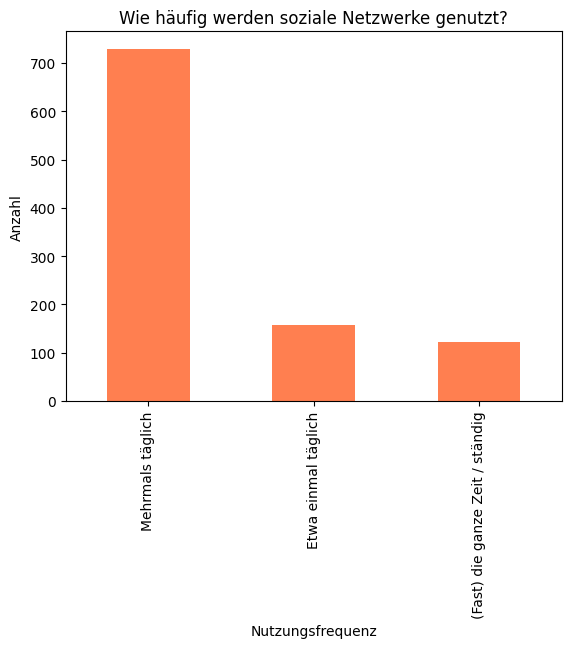

In [33]:
# Nutzungsfrequenz sozialer Netzwerke
df['SC1'].value_counts().plot(kind='bar', color='coral')
plt.xlabel('Nutzungsfrequenz')
plt.ylabel('Anzahl')
plt.title('Wie häufig werden soziale Netzwerke genutzt?')
plt.show()

### Zusammenhang: Demokratische Zufriedenheit (Q27) und Demokratie als Idee (Q28)
Wir untersuchen, wie die Zufriedenheit mit der Demokratie (Q27) mit der Bewertung der Demokratie als Idee (Q28) zusammenhängt. Beide Variablen werden als kategorial angenommen.

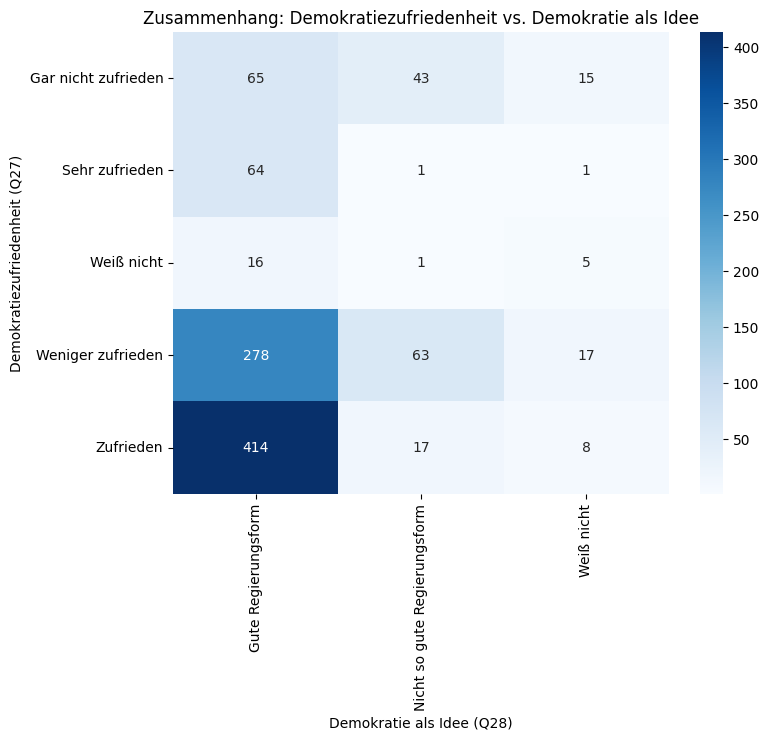

In [34]:
# Kreuztabelle und Visualisierung
crosstab = pd.crosstab(df['Q27'], df['Q28'])
plt.figure(figsize=(8,6))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Demokratie als Idee (Q28)')
plt.ylabel('Demokratiezufriedenheit (Q27)')
plt.title('Zusammenhang: Demokratiezufriedenheit vs. Demokratie als Idee')
plt.show()

Die Heatmap zeigt, wie die beiden Einschätzungen zusammenhängen. Dunklere Felder stehen für mehr Nennungen in der jeweiligen Kombination.

### Visualisierung: Zusammenhang zwischen Demokratiezufriedenheit (Q27) und politischem Interesse (Q4)
Wir visualisieren den Zusammenhang zwischen der Zufriedenheit mit der Demokratie (Q27) und dem politischen Interesse (Q4) als gruppierte Balkendiagramme.

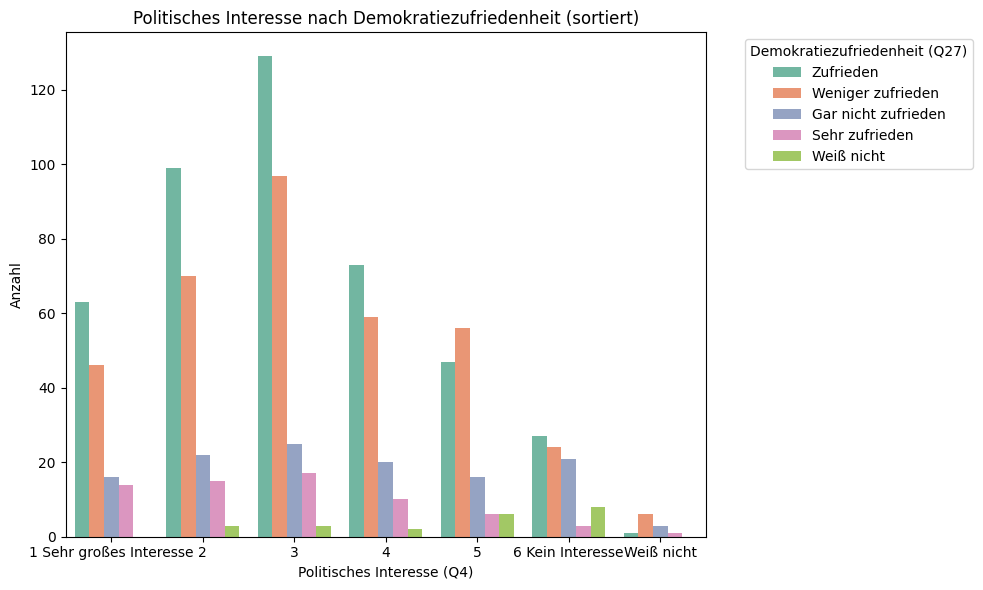

In [35]:
# Gruppiertes Balkendiagramm: Politisches Interesse nach Demokratiezufriedenheit (sortiert)
plt.figure(figsize=(10,6))
# Definiere die gewünschte Sortierung explizit
order_q4 = [
    '1 Sehr großes Interesse',
    '2',
    '3',
    '4',
    '5',
    '6 Kein Interesse',
    'Weiß nicht'
]
order_q27 = df['Q27'].value_counts().index
sns.countplot(data=df, x='Q4', hue='Q27', order=order_q4, hue_order=order_q27, palette='Set2')
plt.xlabel('Politisches Interesse (Q4)')
plt.ylabel('Anzahl')
plt.title('Politisches Interesse nach Demokratiezufriedenheit (sortiert)')
plt.legend(title='Demokratiezufriedenheit (Q27)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Die x-Achse ist nun von 1 (sehr großes Interesse) bis 6 (kein Interesse) sowie "Weiß nicht" sortiert, entsprechend der Skala im Fragebogen.

### Relative Häufigkeiten: Politisches Interesse nach Demokratiezufriedenheit
Die folgende Tabelle zeigt die relativen Häufigkeiten (Prozentwerte) der Demokratiezufriedenheits-Gruppen innerhalb jeder Ausprägung des politischen Interesses (Q4).

In [36]:
# Kreuztabelle: absolute und relative Häufigkeiten
crosstab_abs = pd.crosstab(df['Q4'], df['Q27'])
crosstab_rel = crosstab_abs.div(crosstab_abs.sum(axis=1), axis=0) * 100
crosstab_rel = crosstab_rel.loc[[
    '1 Sehr großes Interesse', '2', '3', '4', '5', '6 Kein Interesse', 'Weiß nicht'
]]  # Sortierung wie in der Grafik
crosstab_rel.round(1)

Q27,Gar nicht zufrieden,Sehr zufrieden,Weiß nicht,Weniger zufrieden,Zufrieden
Q4,,,,,
1 Sehr großes Interesse,11.5,10.1,0.0,33.1,45.3
2,10.5,7.2,1.4,33.5,47.4
3,9.2,6.3,1.1,35.8,47.6
4,12.2,6.1,1.2,36.0,44.5
5,12.2,4.6,4.6,42.7,35.9
6 Kein Interesse,25.3,3.6,9.6,28.9,32.5
Weiß nicht,27.3,9.1,0.0,54.5,9.1


Die Tabelle zeigt für jede Ausprägung des politischen Interesses (Zeile) die prozentuale Verteilung der Demokratiezufriedenheit (Spalten). Die Werte sind auf eine Nachkommastelle gerundet.

### Visualisierung: Relative Häufigkeiten der Demokratiezufriedenheit nach politischem Interesse (gestapeltes Balkendiagramm)
Die folgende Grafik zeigt die prozentuale Verteilung der Demokratiezufriedenheit (Q27) innerhalb jeder Gruppe des politischen Interesses (Q4) als gestapeltes Balkendiagramm.

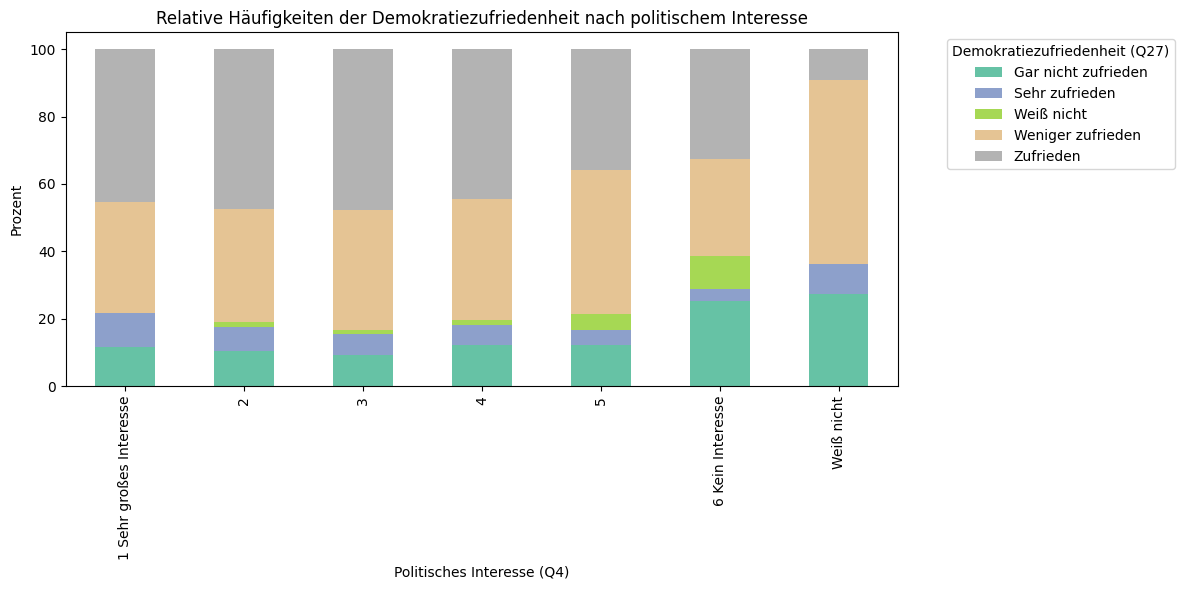

In [37]:
# Gestapeltes Balkendiagramm (Stacked Barplot) für relative Häufigkeiten
crosstab_rel_plot = crosstab_rel.fillna(0)
crosstab_rel_plot.index = [
    '1 Sehr großes Interesse', '2', '3', '4', '5', '6 Kein Interesse', 'Weiß nicht'
]
ax = crosstab_rel_plot.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2')
plt.ylabel('Prozent')
plt.xlabel('Politisches Interesse (Q4)')
plt.title('Relative Häufigkeiten der Demokratiezufriedenheit nach politischem Interesse')
plt.legend(title='Demokratiezufriedenheit (Q27)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Das gestapelte Balkendiagramm zeigt für jede Ausprägung des politischen Interesses die prozentuale Verteilung der Demokratiezufriedenheit.

### Q27 als geordneter Faktor
Wir definieren Q27 als geordneten Faktor entsprechend der Skala im Fragebogen und stellen sicher, dass die Visualisierung und Kreuztabelle diese Reihenfolge nutzen.

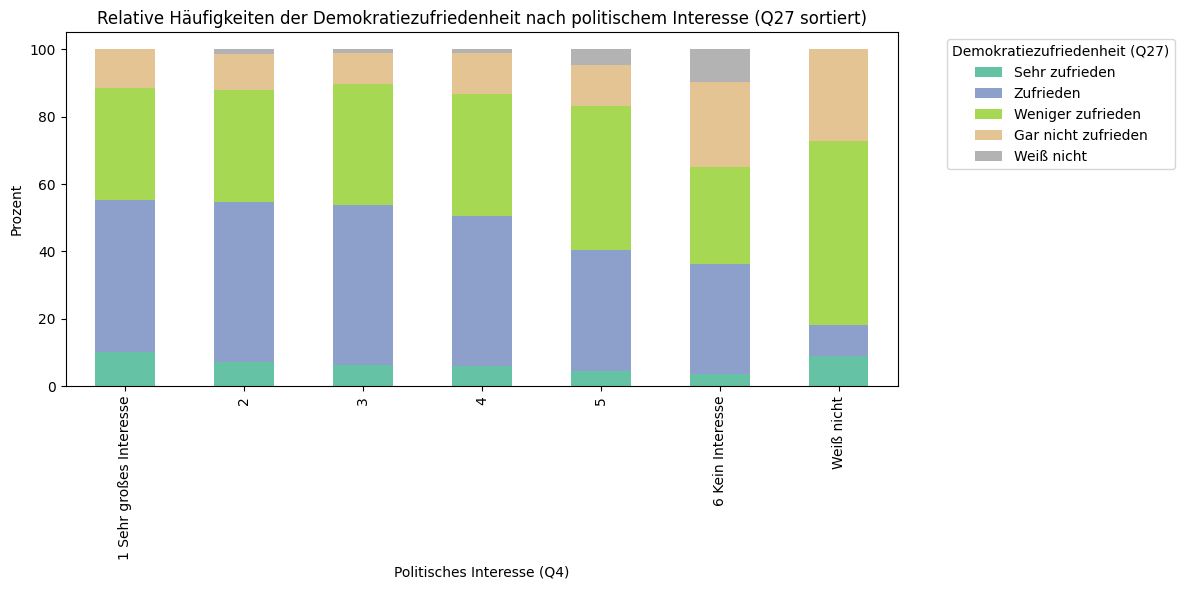

In [38]:
# Q27 als geordneter Faktor definieren
q27_order = [
    'Sehr zufrieden',
    'Zufrieden',
    'Weniger zufrieden',
    'Gar nicht zufrieden',
    'Weiß nicht'
]
df['Q27'] = pd.Categorical(df['Q27'], categories=q27_order, ordered=True)

# Kreuztabelle und relative Häufigkeiten neu berechnen mit sortierter Q27
crosstab_abs = pd.crosstab(df['Q4'], df['Q27'])
crosstab_rel = crosstab_abs.div(crosstab_abs.sum(axis=1), axis=0) * 100
crosstab_rel = crosstab_rel.loc[[
    '1 Sehr großes Interesse', '2', '3', '4', '5', '6 Kein Interesse', 'Weiß nicht'
], q27_order]

# Gestapeltes Balkendiagramm (Stacked Barplot) für relative Häufigkeiten mit sortierter Q27
ax = crosstab_rel.fillna(0).plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2')
plt.ylabel('Prozent')
plt.xlabel('Politisches Interesse (Q4)')
plt.title('Relative Häufigkeiten der Demokratiezufriedenheit nach politischem Interesse (Q27 sortiert)')
plt.legend(title='Demokratiezufriedenheit (Q27)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [39]:
### Korrelation zwischen Demokratiezufriedenheit (Q27) und politischem Interesse (Q4)
# Wir berechnen die Korrelation zwischen den beiden Variablen, wobei jeweils die Kategorie "Weiß nicht" ausgeschlossen wird. Beide Variablen werden als ordinal codiert.

# Ordinale Codierung für Korrelation (ohne "Weiß nicht")
q27_map = {
    'Sehr zufrieden': 4,
    'Zufrieden': 3,
    'Weniger zufrieden': 2,
    'Gar nicht zufrieden': 1
}
q4_map = {
    '1 Sehr großes Interesse': 6,
    '2': 5,
    '3': 4,
    '4': 3,
    '5': 2,
    '6 Kein Interesse': 1
}
# Filter ohne "Weiß nicht"
df_corr = df[(df['Q27'] != 'Weiß nicht') & (df['Q4'] != 'Weiß nicht')].copy()
df_corr['Q27_num'] = df_corr['Q27'].map(q27_map)
df_corr['Q4_num'] = df_corr['Q4'].map(q4_map)
# Korrelation berechnen (Spearman, da ordinal)
correlation = df_corr[['Q27_num', 'Q4_num']].corr(method='spearman').iloc[0,1]
print(f'Spearman-Korrelation zwischen Demokratiezufriedenheit und politischem Interesse: {correlation:.2f}')

Spearman-Korrelation zwischen Demokratiezufriedenheit und politischem Interesse: 0.11


Die berechnete Korrelation gibt an, wie stark Demokratiezufriedenheit und politisches Interesse (je höher, desto mehr Interesse) zusammenhängen. Es werden nur Fälle ohne "Weiß nicht" berücksichtigt.

## Zusammenhang zwischen Vertrauen in klassische Regierungsinformationen und Social Media Nutzung zur politischen Information

**Hypothese:** Je höher das Vertrauen in klassische Regierungsinformationen (z. B. Webseiten, Broschüren), desto seltener nutzen Personen Social Media zur politischen Information.

**Datenbasis:**
- Vertrauen in klassische Regierungsinformationen: Frage 23 (Q23_1 bis Q23_14, z.B. "Webseiten der Bundesregierung", "Broschüren der Bundesregierung" etc.)
- Nutzung von Social Media zur politischen Information: Frage 6G (Q6_7)

Wir bereiten die Variablen auf, führen eine Regressionsanalyse durch und visualisieren die Ergebnisse für eine Präsentation.

In [40]:
# 1. Vorbereitung der Variablen
# Vertrauen in klassische Regierungsinformationen: Mittelwert aus Q23_1 (Webseiten) und Q23_2 (Broschüren)
vertrauen_klassisch = df[['Q23_1', 'Q23_2']].replace({
    'Sehr wichtig': 4,
    'Wichtig': 3,
    'Weniger wichtig': 2,
    'Unwichtig': 1,
    'Kenne ich nicht': np.nan,
    'Weiß nicht': np.nan
}).astype(float).mean(axis=1)

# Nutzung Social Media zur politischen Information: Q6_7
# Kodierung: Häufigkeitsskala (z.B. "Nutze ich häufig" bis "Nutze ich nie")
sn_nutzung = df['Q6_7'].replace({
    'Nutze ich häufig': 4,
    'Nutze ich gelegentlich': 3,
    'Nutze ich nur selten': 2,
    'Nutze ich nie': 1,
    'Kenne ich zwar, nutze ich aber nie': 1,
    'Kenne ich nicht': np.nan,
    'Weiß nicht': np.nan
}).astype(float)

# Gemeinsamer DataFrame für Regression
reg_data = pd.DataFrame({
    'Vertrauen_Klassisch': vertrauen_klassisch,
    'SN_Nutzung': sn_nutzung
}).dropna()
reg_data.head()

/var/folders/qn/mc64dhnj33bc5fwdgz5sxvkr0000gp/T/ipykernel_3542/3036025755.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  vertrauen_klassisch = df[['Q23_1', 'Q23_2']].replace({
/var/folders/qn/mc64dhnj33bc5fwdgz5sxvkr0000gp/T/ipykernel_3542/3036025755.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sn_nutzung = df['Q6_7'].replace({


,Vertrauen_Klassisch,SN_Nutzung
0,1.0,3.0
1,3.0,3.0
2,4.0,3.0
3,3.5,1.0
4,3.0,3.0


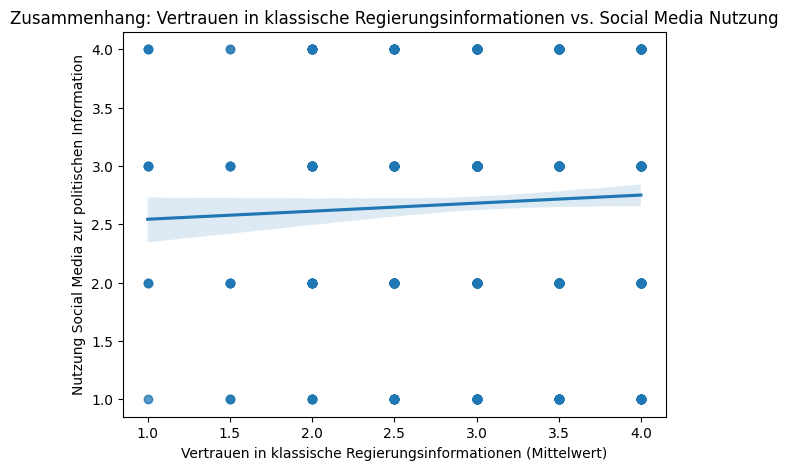

In [41]:
# 2. Deskriptive Visualisierung
plt.figure(figsize=(7,5))
sns.regplot(x='Vertrauen_Klassisch', y='SN_Nutzung', data=reg_data, scatter_kws={'alpha':0.5})
plt.xlabel('Vertrauen in klassische Regierungsinformationen (Mittelwert)')
plt.ylabel('Nutzung Social Media zur politischen Information')
plt.title('Zusammenhang: Vertrauen in klassische Regierungsinformationen vs. Social Media Nutzung')
plt.show()

In [42]:
# 3. Regressionsanalyse
X = reg_data['Vertrauen_Klassisch']
X = sm.add_constant(X)
y = reg_data['SN_Nutzung']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             SN_Nutzung   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.258
Date:                Thu, 29 May 2025   Prob (F-statistic):              0.133
Time:                        18:46:18   Log-Likelihood:                -1392.3
No. Observations:                 991   AIC:                             2789.
Df Residuals:                     989   BIC:                             2798.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.4737    

**Interpretation:**
- Der Regressionskoeffizient zeigt, wie stark die Nutzung von Social Media zur politischen Information mit dem Vertrauen in klassische Regierungsinformationen zusammenhängt.
- Ein negativer Koeffizient unterstützt die Hypothese: Je höher das Vertrauen, desto seltener wird Social Media genutzt.
- Die Visualisierung und das Regressionsmodell können direkt in einer Präsentation verwendet werden.

### Regression mit Faktoren: Vertrauen in klassische Regierungsinformationen (kategorisiert) und Social Media Nutzung
Wir führen eine Regression durch, bei der das Vertrauen in klassische Regierungsinformationen als kategoriale Variable (Faktor) einbezogen wird.

/var/folders/qn/mc64dhnj33bc5fwdgz5sxvkr0000gp/T/ipykernel_3542/3273582120.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sn_nutzung = df['Q6_7'].replace({
/var/folders/qn/mc64dhnj33bc5fwdgz5sxvkr0000gp/T/ipykernel_3542/3273582120.py:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Vertrauen_Faktor', y='SN_Nutzung', data=reg_data_faktor, ci=95, palette='Set2', order=['Sehr wichtig','Wichtig','Weniger wichtig','Unwichtig'])
/var/folders/qn/mc64dhnj33bc5fwdgz5sxvkr0000gp/T/ipykernel_3542/3273582120.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


                            OLS Regression Results                            
Dep. Variable:             SN_Nutzung   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.5003
Date:                Thu, 29 May 2025   Prob (F-statistic):              0.682
Time:                        18:50:14   Log-Likelihood:                -1351.3
No. Observations:                 965   AIC:                             2711.
Df Residuals:                     961   BIC:                             2730.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

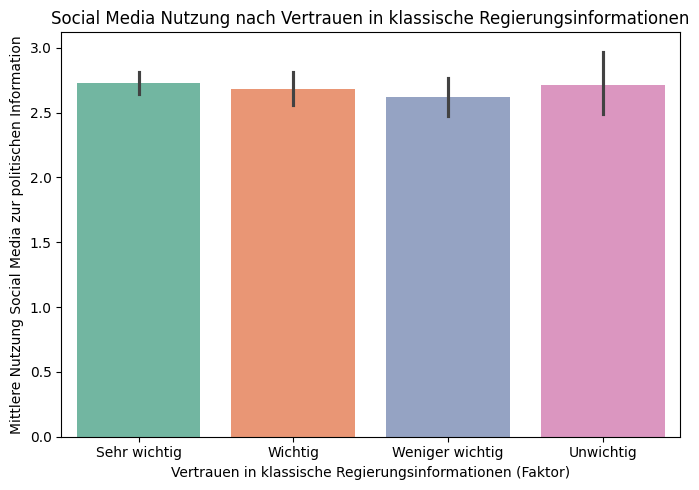

In [43]:
# Vertrauen in klassische Regierungsinformationen als Faktor (kategorisch)
vertrauen_faktor = df[['Q23_1', 'Q23_2']].mode(axis=1)[0].replace({
    'Sehr wichtig': 'Sehr wichtig',
    'Wichtig': 'Wichtig',
    'Weniger wichtig': 'Weniger wichtig',
    'Unwichtig': 'Unwichtig',
    'Kenne ich nicht': np.nan,
    'Weiß nicht': np.nan
})

# Social Media Nutzung wie zuvor
sn_nutzung = df['Q6_7'].replace({
    'Nutze ich häufig': 4,
    'Nutze ich gelegentlich': 3,
    'Nutze ich nur selten': 2,
    'Nutze ich nie': 1,
    'Kenne ich zwar, nutze ich aber nie': 1,
    'Kenne ich nicht': np.nan,
    'Weiß nicht': np.nan
}).astype(float)

# Gemeinsamer DataFrame
reg_data_faktor = pd.DataFrame({
    'Vertrauen_Faktor': vertrauen_faktor,
    'SN_Nutzung': sn_nutzung
}).dropna()

# Regression mit Faktoren (Dummy-Codierung)
import statsmodels.formula.api as smf
model_faktor = smf.ols('SN_Nutzung ~ C(Vertrauen_Faktor)', data=reg_data_faktor).fit()
print(model_faktor.summary())

# Visualisierung: Mittelwerte pro Kategorie
plt.figure(figsize=(7,5))
sns.barplot(x='Vertrauen_Faktor', y='SN_Nutzung', data=reg_data_faktor, ci=95, palette='Set2', order=['Sehr wichtig','Wichtig','Weniger wichtig','Unwichtig'])
plt.xlabel('Vertrauen in klassische Regierungsinformationen (Faktor)')
plt.ylabel('Mittlere Nutzung Social Media zur politischen Information')
plt.title('Social Media Nutzung nach Vertrauen in klassische Regierungsinformationen')
plt.tight_layout()
plt.show()

Die Regression und die Visualisierung zeigen, wie sich die Social Media Nutzung in den verschiedenen Vertrauensgruppen unterscheidet. Die Analyse kann direkt für eine Präsentation verwendet werden.